### Import required packages

In [1]:
import pandas as pd
import numpy as np
import sys
sys.path.append('../scripts')
from load_data import LoadData
import matplotlib.pyplot as plt
import seaborn as sns
import logging
from sklearn.impute import SimpleImputer
from datetime import datetime

sns.set_style("darkgrid")
%matplotlib inline

### Load the test and train datasets

In [2]:
loader = LoadData()
train_df = loader.read_csv('../data/train.csv')
test_df= loader.read_csv('../data/test.csv')
store_df= loader.read_csv('../data/store.csv')
#sample_df=loader.read_csv('../data/sample_submission.csv')

C:\Users\User\anaconda3\envs\envMysql\lib\site-packages\IPython\core\interactiveshell.py:3263: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [4]:
train_df.shape

(1017209, 9)

In [5]:
test_df.shape

(41088, 8)

In [6]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### Merge the training dataset and testing dataset with the stores dataset

In [7]:
combined_train_df = pd.merge(train_df, store_df, on='Store')
combined_train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [8]:
combined_test_df = pd.merge(test_df, store_df, on='Store')
combined_test_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,857,1,3,2015-09-16,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1713,1,2,2015-09-15,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,2569,1,1,2015-09-14,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,3425,1,7,2015-09-13,0.0,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


### EDA on test and training sets

In [51]:
combined_test_df.shape

(41088, 17)

In [52]:
combined_train_df.shape

(1017209, 18)

In [57]:
combined_train_df.dtypes

Store                          int64
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [9]:
### Convert Date column from string to datetime
combined_test_df['Date'] = combined_test_df['Date'].map(lambda x: datetime.strptime(x, '%Y-%m-%d'))
combined_train_df['Date'] = combined_train_df['Date'].map(lambda x: datetime.strptime(x, '%Y-%m-%d'))

#### Checking for distribution of promotions

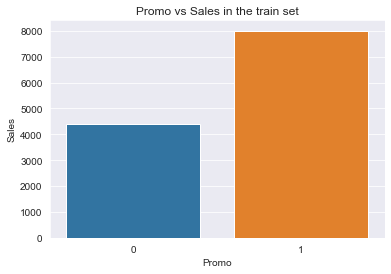

In [10]:
# Sales with respect to Promo in train dataset
sns.barplot(x='Promo', y='Sales', data=combined_train_df).set(title='Promo vs Sales in the train set')
sns.set(rc={'figure.figsize':(8,6)})
plt.show()

More sales were made during the days with promotions

In [92]:
# StateHoliday column has values 0 & "0", So, we need to change values with 0 to "0"
combined_train_df["StateHoliday"].loc[combined_train_df["StateHoliday"] == 0] = "0"

C:\Users\User\anaconda3\envs\envMysql\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


#### Sales vs Holidays

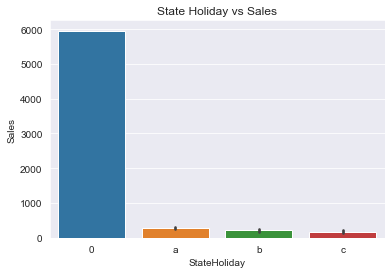

In [94]:
# Sales with respect to State Holiday
sns.barplot(x='StateHoliday', y='Sales', data=combined_train_df).set(title='State Holiday vs Sales')
plt.show()

More sales were made during days that were not holidays since most of the stores were close during the holiday

#### Sales vs Number of customers

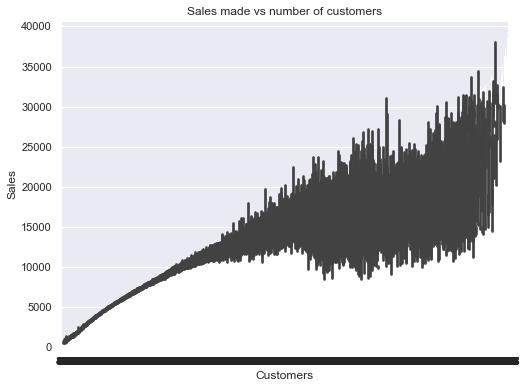

In [15]:
# Sales with respect to State Holiday
sns.barplot(x='Customers', y='Sales', data=combined_train_df).set(title='Sales made vs number of customers')
plt.show()

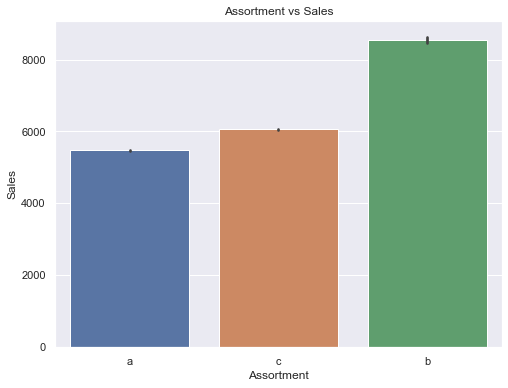

In [107]:
sns.barplot(x='Assortment', y='Sales', data=combined_train_df).set(title='Assortment vs Sales')
sns.set(rc={'figure.figsize':(6,8)})
plt.show()

#### Sales made on weekends vs Sales made on Weekdays

In [16]:
#Extracting weekdays
combined_test_df['isWeekend'] = combined_test_df['DayOfWeek'].map(lambda x: 0 if x < 6 else 1)
combined_train_df['isWeekend'] = combined_train_df['DayOfWeek'].map(lambda x: 0 if x < 6 else 1)

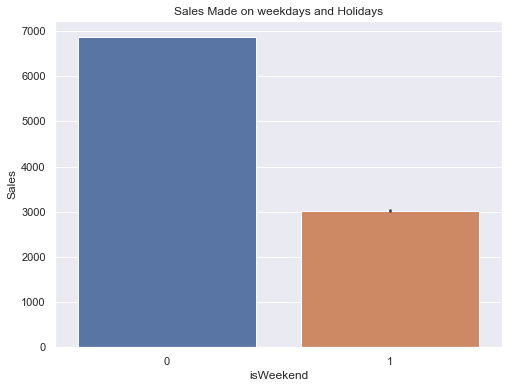

In [17]:
sns.barplot(x='isWeekend', y='Sales', data=combined_train_df).set(title='Sales Made on weekdays and Holidays')
plt.show()

More sales were made on weekdays since some stores were closed on weekends

#### Sales made in various periods of the  month: (Start month, mid month and end month)

In [19]:
def setMonthPeriod(date):
    if date.day < 11: 
        return 'start month'
    elif date.day <= 21:
        return 'mid month'
    else:
        return 'end month'

In [20]:
def setMnth(df):
    df['month_period'] = df['Date'].apply(setMonthPeriod)
    return df

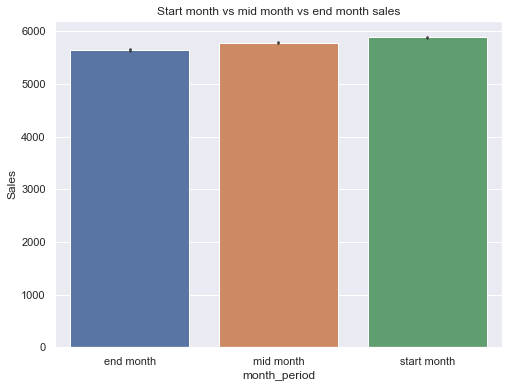

In [22]:
combined_train_df = setMnth(combined_train_df)
sns.barplot(x='month_period', y='Sales', data=combined_train_df).set(title='Start month vs mid month vs end month sales')
plt.show()

The month period (start month, mid month and end month) did not have an strong impact on the total sales made